# TP - Intelligence artificielle pour la santé
# Convolutions

Gilles Cohen | gilles.cohen@univ.lyon1.fr

M2 - UCBL Université Lyon.



Objectifs:
- Application de convolution sur images

# Nom étudiant:  DORIVAL

# Prénom étudiant: Pierre Chrislin

## Instruction de soumission
1.  L'étudiant doit insérer le code Python où c'est demandé TODO .

2.  Préfixer ce fichier notebook avec nom_prenom_

3.  Insérez votre nom et prénom dans la cellule suivante.

### Lecture et visualisation d'images

Le code suivant permet de lire une image, de la placer dans un tableau numpy et de l'afficher dans le notebook.

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize

sample image shape:  (600, 600, 3)


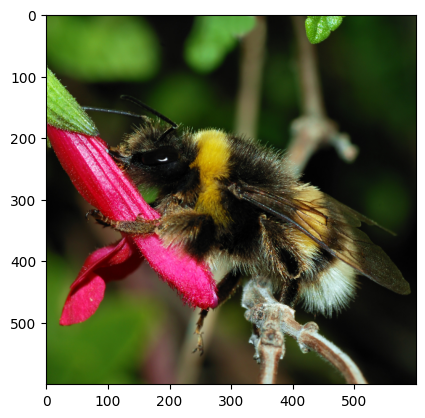

In [83]:
sample_image = imread("bumblebee.png")
sample_image= sample_image.astype("float32")

size = sample_image.shape
print("sample image shape: ", sample_image.shape)

plt.imshow(sample_image.astype('uint8'));

### Un filftre de convolution simple

Le but de cette section est d'utiliser tensorflow / Keras pour effectuer des convolutions individuelles sur des images. Cette section n'implique pas encore l'apprentissage d'un modèle.

In [84]:

import tensorflow as tf
print(tf.__version__)



2.18.0


In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

In [86]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same",
              input_shape=(None, None, 3))

Rappelez-vous : dans Keras, `None` est utilisé comme marqueur pour les dimensions de tenseur avec une taille dynamique. Dans ce cas, `batch_size`, `width` et `height` sont tous dynamiques : ils peuvent dépendre de l'entrée. Seul le nombre de canaux d'entrée (3 couleurs) a été fixé.

In [87]:
sample_image.shape

(600, 600, 3)

In [88]:
img_in = np.expand_dims(sample_image, 0)
img_in.shape

(1, 600, 600, 3)

**Questions**: 


Si on applique cette convolution à cette image, quelle sera la forme de la carte de caractéristiques générée ?

Indications :

- dans Keras, `padding="same"` signifie que les convolutions utilisent autant de padding que nécessaire afin de préserver la dimension spatiale des cartes ou images d'entrée ;

- dans Keras, les convolutions n'ont pas de strides par défaut.

Bonus : quelle quantité de padding Keras doit-il utiliser pour préserver les dimensions spatiales dans ce cas particulier ?


### **1. Forme de la carte de caractéristiques générée**

#### **Données initiales**
- **Image d'entrée :** `(batch_size, height, width, channels)` où la taille spatiale est `(600, 600)` et les canaux RGB sont 3 → `(1, 600, 600, 3)`.
- **Nombre de filtres :** `filters=3`.
- **Taille du kernel :** `(5, 5)`.
- **Padding :** `"same"`.


#### **Effet du padding `"same"`**
- `"same"` signifie que la sortie aura les **mêmes dimensions spatiales** que l'entrée, soit :
 
  Output Height = Input Height = 600
  
  Output Width = Input Width= 600
  

- **Nombre de canaux de sortie :** Correspond au nombre de filtres définis, soit **3**.

#### **Forme de sortie**
La forme de la carte de caractéristiques générée sera :
Output Shape = (batch_size, height, width, filters) = (1, 600, 600, 3)

### **2. Quantité de padding nécessaire**

Pour conserver les dimensions avec `"same"`, une quantité de padding est ajoutée de manière égale autour de l'image. Le calcul du padding total pour chaque dimension (hauteur et largeur) est donné par :

Total Padding = Kernel Size - 1 = 5 - 1 = 4


#### **Répartition du padding**
Le padding est réparti également sur les deux côtés :
$$
\begin{array}{l}
Padding par côté =\frac{Total Padding}{2}=\frac{4}{2} = 2 \\
\end{array}
$$
- Cela signifie que Keras ajoute **2 pixels de padding** sur chaque bord de l'image (haut, bas, gauche et droite).

In [13]:
img_out = conv(img_in)
print(type(img_out), img_out.shape)

<class 'tensorflow.python.framework.ops.EagerTensor'> (1, 600, 600, 3)


La sortie est un tensorflow Eager Tensor, qui peut être converti pour obtenir un tableau numpy standard :

In [10]:
np_img_out = img_out[0].numpy()
print(type(np_img_out))

<class 'numpy.ndarray'>


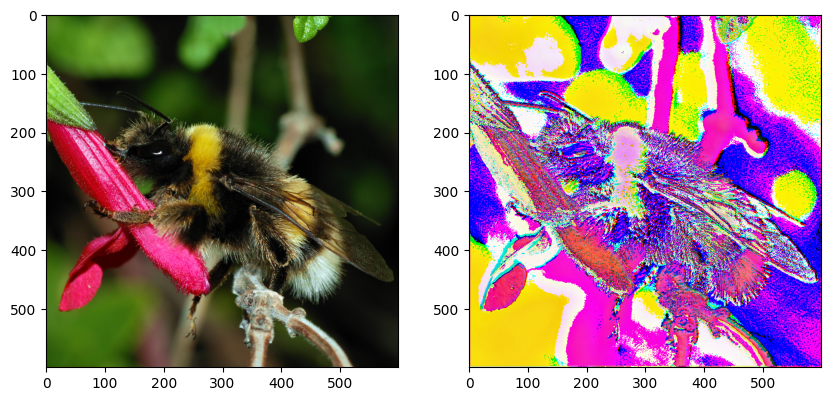

In [11]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
ax1.imshow(np_img_out.astype('uint8'));

La sortie a 3 canaux, et peut donc être interprétée comme une image RGB avec matplotlib. Cependant, il s'agit du résultat d'un filtre convolutionnel aléatoire appliqué à l'image originale.


Examinons les paramètres :

In [12]:
conv.count_params()

228

**Question**: Peut-on calculer le nombre de paramètres entraînables à partir des hyperparamètres de la couche ?

Indices :

- l'image d'entrée a 3 couleurs et un seul **noyau de convolution** mélange les informations des trois canaux d'entrée pour calculer sa sortie ;

- une **couche de convolution** produit plusieurs canaux à la fois : chaque canal est la sortie d'une opération de convolution distincte (également appelée unité) de la couche ;

- n'oubliez pas les biais !

### Réponse

Une couche convolutionnelle a deux types de paramètres :
1. **Poids des noyaux de convolution** : Chaque filtre a une matrice de poids pour chaque canal d'entrée.
2. **Biais** : Chaque filtre a un unique biais.



Le nombre total de paramètres d'une couche convolutionnelle est donné par :

Nombre total de paramètres = taille du noyau (H × W) x canaux d'entrée x nombre de filtres  + nombre de filtres


#### **Données :**
- **Canaux d'entrée** :  Cin = 3(RGB).
- **Taille du noyau** :  H x W = 5 x 5 = 25 .
- **Nombre de filtres** : Cout = 3 .
- Chaque filtre mélange les informations des 3 canaux d'entrée.
- Chaque filtre a 1 paramètre de biais.

#### **Calcul des poids des noyaux** :
Chaque filtre a :

Poids par filtre = taille du noyau x canaux d'entrée = 5 x 5 x 3 = 75

Pour Cout = 3  filtres :

Poids totaux = 75 x 3 = 225


#### **Calcul des biais** :
Chaque filtre a un biais, donc pour  Cout = 3 :

Biais totaux = 3


#### **Paramètres totaux** :

Paramètres totaux = Poids totaux + Biais totaux = 225 + 3 = 228


### **Résultat général**

Si nous avons les hyperparamètres suivants :
- Taille du noyau :  H x W ,
- Canaux d'entrée :  Cin,
- Nombre de filtres (sorties) :  Cout,

Le nombre total de paramètres entraînables est donné par :

Nombre total de paramètres = H x W x Cin x Cout + Cout




### **Validation**

Avec les valeurs fournies dans votre cas :
-  H = 5 ,  W = 5 ,  Cin = 3 ,  Cout = 3 ,
- Les paramètres entraînables sont :  5 x 5 x 3 x 3 + 3 = 228
  

Donc, oui, on peut calculer les **paramètres entraînables** d'une couche convolutionnelle à partir des **hyperparamètres**.

Solution : introspecter le modèle keras :

In [12]:
len(conv.get_weights())

2

In [13]:
weights = conv.get_weights()[0]
weights.shape

(5, 5, 3, 3)

Chacun des trois canaux de sortie est généré par un noyau de convolution distinct.

Chaque noyau de convolution a une taille spatiale de 5x5 et fonctionne sur 3 canaux d'entrée.

In [14]:
biases = conv.get_weights()[1]
biases.shape

(3,)

Un biais par canal de sortie.

On peut aussi construire un noyau en définissant une fonction qui sera passée à la couche `Conv2D`.
On va créer un tableau avec 1/25 pour les filtres, avec chaque canal séparé. 

In [30]:
def my_init(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / 25
    array[:, :, 1, 1] = 1 / 25
    array[:, :, 2, 2] = 1 / 25
    return array

On peut afficher les filtres numpy en déplaçant les dimensions spatiales à la fin (en utilisant `np.transpose`) :

In [61]:
np.transpose(my_init(), (2, 3, 0, 1))

array([[[[0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04]],

        [[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]]],


       [[[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]],

        [[0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
      

In [32]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same",
           input_shape=(None, None, 3), kernel_initializer=my_init)

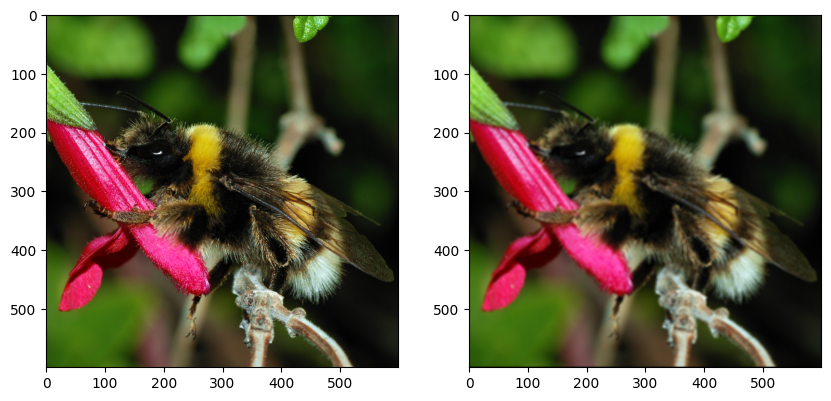

In [33]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))

img_out = conv(img_in)
np_img_out = img_out[0].numpy()
ax1.imshow(np_img_out.astype('uint8'));

**Exercice**
- Définir une couche Conv2D avec 3 filtres (5x5) qui calculent la fonction d'identité (préserver l'image d'entrée sans mélanger les couleurs).
- Changez le stride à 2. Quelle est la taille de l'image de sortie ?
- Modifiez le padding pour qu'il soit égal à "VALID". Qu'observez-vous ?

# Réponse

In [121]:
# Définir une fonction d'initialisation pour créer des filtres d'identité
def identity_initializer(shape, dtype=None):
    array = np.zeros(shape, dtype=dtype)
    center = shape[0] // 2  # position du centre (3x3), soit 2 pour 5x5
    array[center, center, 0, 0] = 1  # Pour le premier filtre
    array[center, center, 1, 1] = 1  # Pour le deuxième filtre
    array[center, center, 2, 2] = 1  # Pour le troisième filtre
    return array

In [70]:

# Créer un modèle avec une couche de convolution
model = Sequential()

model.add(Conv2D(filters=3, kernel_size=(5, 5), strides=2, padding="same", 
                 kernel_initializer=identity_initializer, input_shape=(None, None, 3)))

In [71]:
# Afficher les informations sur le modèle
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, None, None, 3)  │           228 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228 (912.00 B)

 Trainable params: 228 (912.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


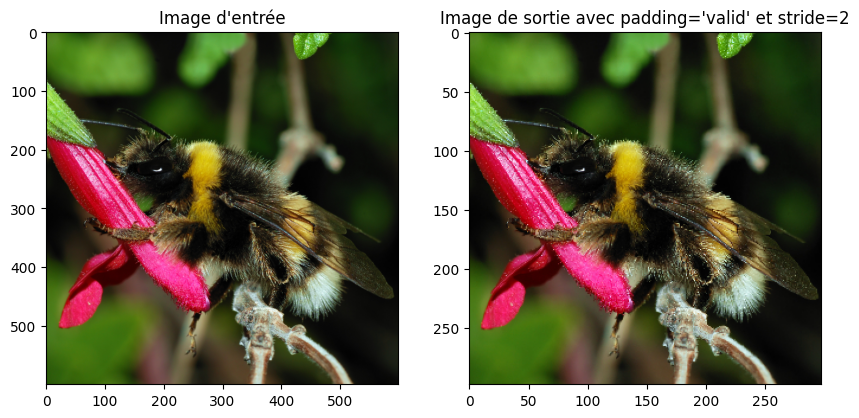

In [91]:

# Modifier le padding à "VALID" et stride = 2
model.layers[0].padding = 'valid'

img_in = np.expand_dims(sample_image, 0)

# Passer l'image à travers la couche
img_out = model.predict(img_in)

# Afficher l'image d'entrée et la sortie
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax0.set_title("Image d'entrée")

ax1.imshow(img_out[0].astype('uint8'))
ax1.set_title("Image de sortie avec padding='valid' et stride=2")
plt.show()



(1, 600, 600, 3)

### Travail sur la détection des contours d'une image en niveaux de gris

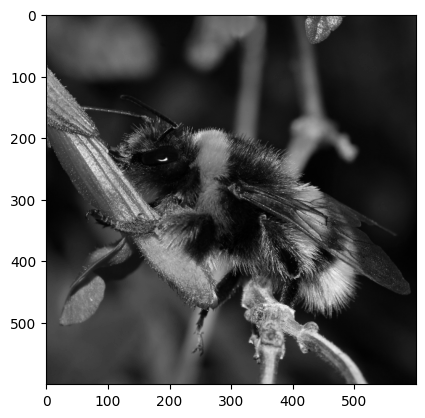

In [92]:
# convertir image en niveaux de gris
grey_sample_image = sample_image.mean(axis=2)

grey_sample_image = grey_sample_image[:, :, np.newaxis]

plt.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray);

**Exercice**
- Construire un détecteur d'arêtes en utilisant `Conv2D` sur une image en niveaux de gris
- Vous pouvez expérimenter avec plusieurs noyaux pour trouver un moyen de détecter les bords.
- https://en.wikipedia.org/wiki/Kernel_(image_processing)

Essayez `Conv2D?` ou appuyez sur `shift-tab` pour obtenir la documentation. Vous pouvez obtenir de l'aide à l'adresse suivante : https://keras.io/layers/convolutional/

# Réponse

Pour construire un détecteur d'arêtes en utilisant une couche Conv2D sur une image en niveaux de gris, on peut appliquer des filtres de détection de bords populaires comme Sobel, Prewitt, ou des noyaux spécifiques pour détecter les contours dans les images.

Les noyaux de détection de bords sont généralement utilisés dans les techniques de traitement d'image pour extraire les informations des transitions de couleur ou de luminosité (bordures) dans une image.

In [95]:
# noyau Sobel pour la détection des bords (horizontal et vertical)

sobel_kernel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]], dtype='float32')

sobel_kernel_y = np.array([[-1, -2, -1],
                           [ 0,  0,  0],
                           [ 1,  2,  1]], dtype='float32')

In [96]:

# Ajouter une dimension pour correspondre à la forme attendue par Conv2D
sobel_kernel_x = sobel_kernel_x[..., np.newaxis, np.newaxis]  # Shape (3, 3, 1, 1)
sobel_kernel_y = sobel_kernel_y[..., np.newaxis, np.newaxis]  # Shape (3, 3, 1, 1)

In [97]:

# Créer le modèle avec une couche de convolution
model = Sequential()

# Ajouter la couche Conv2D sans initialiser les poids ici
model.add(Conv2D(filters=1, kernel_size=(3, 3), padding="same", 
                 input_shape=(None, None, 1), use_bias=False))

In [98]:
# Initialiser les poids de la couche avec les noyaux Sobel
model.layers[0].set_weights([sobel_kernel_x])  # Applique Sobel pour les bords horizontaux

# Résumé du modèle
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)              │ (None, None, None, 1)  │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [99]:
# Appliquer l'image d'entrée gris
grey_sample_image = grey_sample_image.astype(np.float32)  
img_in = np.expand_dims(grey_sample_image, axis=0)  # Ajouter dimension batch

In [100]:

# Passer l'image à travers la couche de convolution
img_out_x = model.predict(img_in)

# Créer un nouveau modèle pour appliquer Sobel vertical
model.layers[0].set_weights([sobel_kernel_y])  # Modifier le noyau pour Sobel vertical
img_out_y = model.predict(img_in)

# Combinez les deux directions pour avoir une détection d'arêtes complète
img_out = np.sqrt(img_out_x**2 + img_out_y**2)  # Calculer la magnitude des bords

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


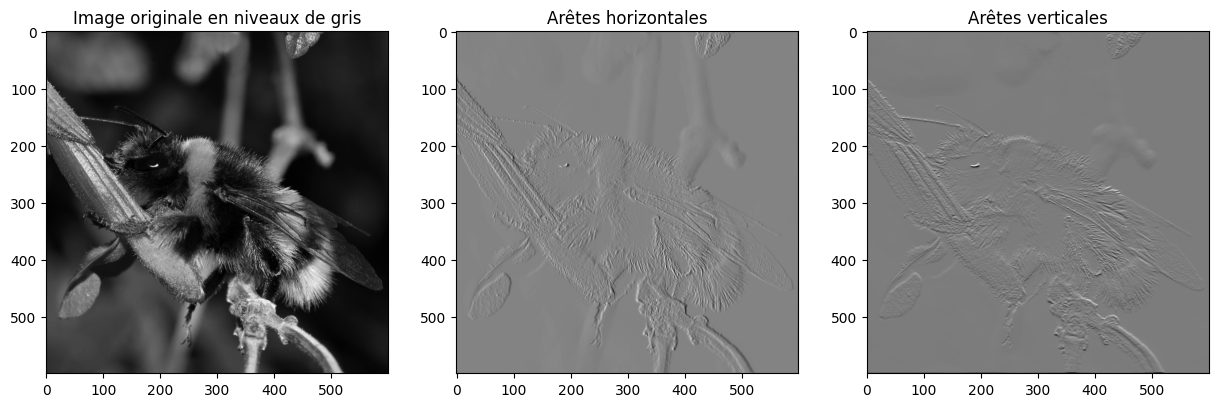

In [101]:


# Affichage des résultats
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 5))

ax0.imshow(np.squeeze(grey_sample_image), cmap=plt.cm.gray)
ax0.set_title("Image originale en niveaux de gris")

ax1.imshow(np.squeeze(img_out_x[0]), cmap=plt.cm.gray)
ax1.set_title("Arêtes horizontales")

ax2.imshow(np.squeeze(img_out_y[0]), cmap=plt.cm.gray)
ax2.set_title("Arêtes verticales")

plt.show()


### Pooling et strides avec convolutions

**Exercice**
- Utilisez `MaxPool2D` pour appliquer un pool 2x2 max avec strides 2 à l'image. Quel est l'impact sur la forme de l'image ?
- Utilisez `AvgPool2D` pour appliquer un pooling moyen.
- Est-il possible de calculer un pooling max et un pooling moyen avec des noyaux bien choisis ?

**Bonus**
- Implémenter un pooling moyen 3x3 avec une convolution régulière `Conv2D`, avec des strides, un noyau et un padding bien choisis.

In [113]:
from keras.layers import MaxPooling2D, AvgPool2D, Conv2D, Input

In [116]:
# 1. Appliquer MaxPooling2D avec un noyau 2x2 et strides 2
maxpool_layer = MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")
img_maxpool = maxpool_layer(img_in)

In [117]:
# 2. Appliquer AvgPooling2D avec un noyau 2x2 et strides 2
avgpool_layer = AvgPool2D(pool_size=(2, 2), strides=2, padding="same")
img_avgpool = avgpool_layer(img_in)

In [118]:
# 3. Simuler un Average Pooling 3x3 avec une convolution Conv2D

# Création d'un noyau 3x3 pour average pooling 
avg_pool_kernel = np.ones((3, 3, 1, 1)) / 9  

# Créer un modèle avec un input layer
input_layer = Input(shape=(None, None, 1))

In [119]:

# Créer la couche Conv2D pour effectuer un average pooling
conv_layer = Conv2D(filters=1, kernel_size=(3, 3), strides=1, padding="same", use_bias=False)(input_layer)

# Créer le modèle avec l'input et la couche Conv2D
model = Model(inputs=input_layer, outputs=conv_layer)

# Affecter manuellement les poids du noyau (pas de biais dans ce cas)
model.layers[1].set_weights([avg_pool_kernel])

# Appliquer le modèle Conv2D
img_avgpool_conv = model(img_in)

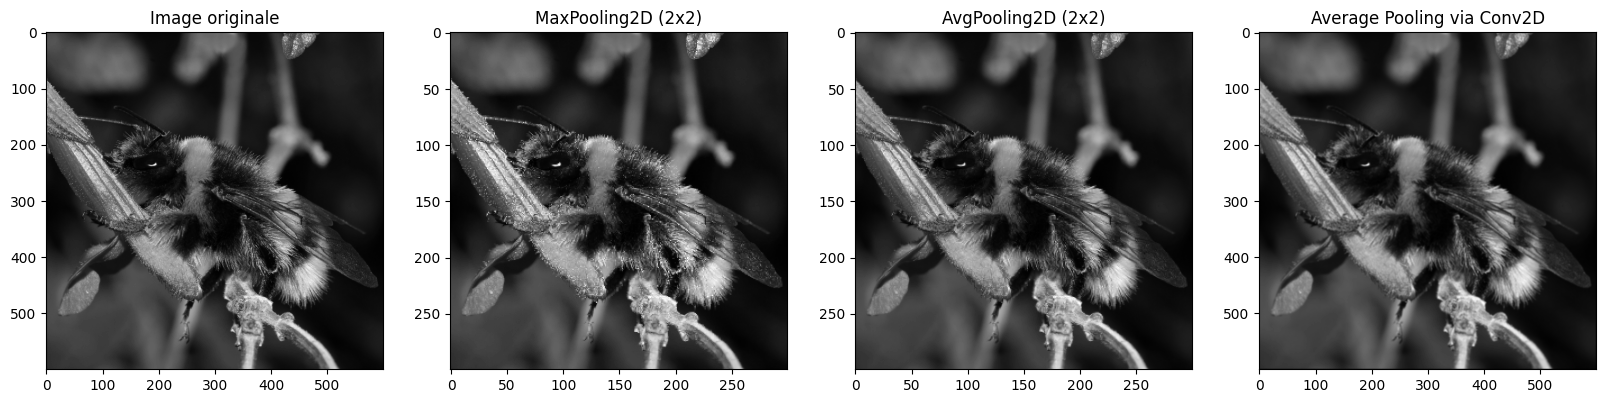

In [122]:


# Affichage des résultats
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(20, 5))

ax0.imshow(np.squeeze(grey_sample_image), cmap=plt.cm.gray)
ax0.set_title("Image originale")

ax1.imshow(np.squeeze(img_maxpool[0]), cmap=plt.cm.gray)
ax1.set_title("MaxPooling2D (2x2)")

ax2.imshow(np.squeeze(img_avgpool[0]), cmap=plt.cm.gray)
ax2.set_title("AvgPooling2D (2x2)")

ax3.imshow(np.squeeze(img_avgpool_conv[0]), cmap=plt.cm.gray)
ax3.set_title("Average Pooling via Conv2D")

plt.show()
